## A Comparative Evaluation of Machine Learning Approaches for Fake News Classification

#### W.M.T.Dilmini  - (ITBIN-2211-0111)     
#### D.M.J.Jaya Sri - (ITBIN-2211-0125)     
#### J.M.M.Prabash  - (ITBIN-2211-0331)    
#### W.R.U.Sethmini - (ITBIN-2211-0101)    

In [57]:
pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)

   ------------- -------------------------- 1/3 [imbalanced-learn]
   ---------------------------------------- 3/3 [imblearn]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score, silhouette_score
from imblearn.over_sampling import SMOTE
from textblob import TextBlob
import pickle

In [75]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('stopwords')
    nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\janaka
[nltk_data]     jayasri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\janaka
[nltk_data]     jayasri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
fake_news = pd.read_csv('Fake.csv')
real_news = pd.read_csv('True.csv')
fake_news['label'] = 0
real_news['label'] = 1
df = pd.concat([fake_news, real_news], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)


C:\Users\janaka jayasri\AppData\Local\Temp\ipykernel_18352\950415452.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_news = pd.read_csv('Fake.csv')


 # Data Exploration

In [77]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Label Distribution:\n", df['label'].value_counts())
print("Subject Distribution:\n", df['subject'].value_counts())

Dataset Shape: (44919, 173)
Columns: ['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'U

Summary Statistics

In [78]:
df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,Porous Texas border fence foreshadows challeng...,"BROWNSVILLE, Texas (Reuters) - The rust-colore...",politicsNews,"December 2, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Trade in focus at hearing for Trump's nominee ...,WASHINGTON (Reuters) - U.S. senators stressed ...,worldnews,"October 3, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,‘American Sniper’ Widow Gets Set Straight Aft...,"Taya Kyle, the widow of infamous American Sni...",News,8-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Woman Gets Death Threats Just For Posting A P...,"After last week s election, Hillary supporters...",News,15-Nov-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,PNG says Australia responsible for hundreds of...,SYDNEY (Reuters) - Australia will not be allow...,worldnews,"October 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [79]:

df['text_len'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print("Summary Statistics for Numerical Features:\n", df[['text_len', 'word_count']].describe())

Summary Statistics for Numerical Features:
            text_len    word_count
count  44919.000000  44919.000000
mean    2463.735680    404.453127
std     2096.910724    340.541545
min        1.000000      0.000000
25%     1233.000000    203.000000
50%     2186.000000    362.000000
75%     3105.000000    512.000000
max    32759.000000   5471.000000


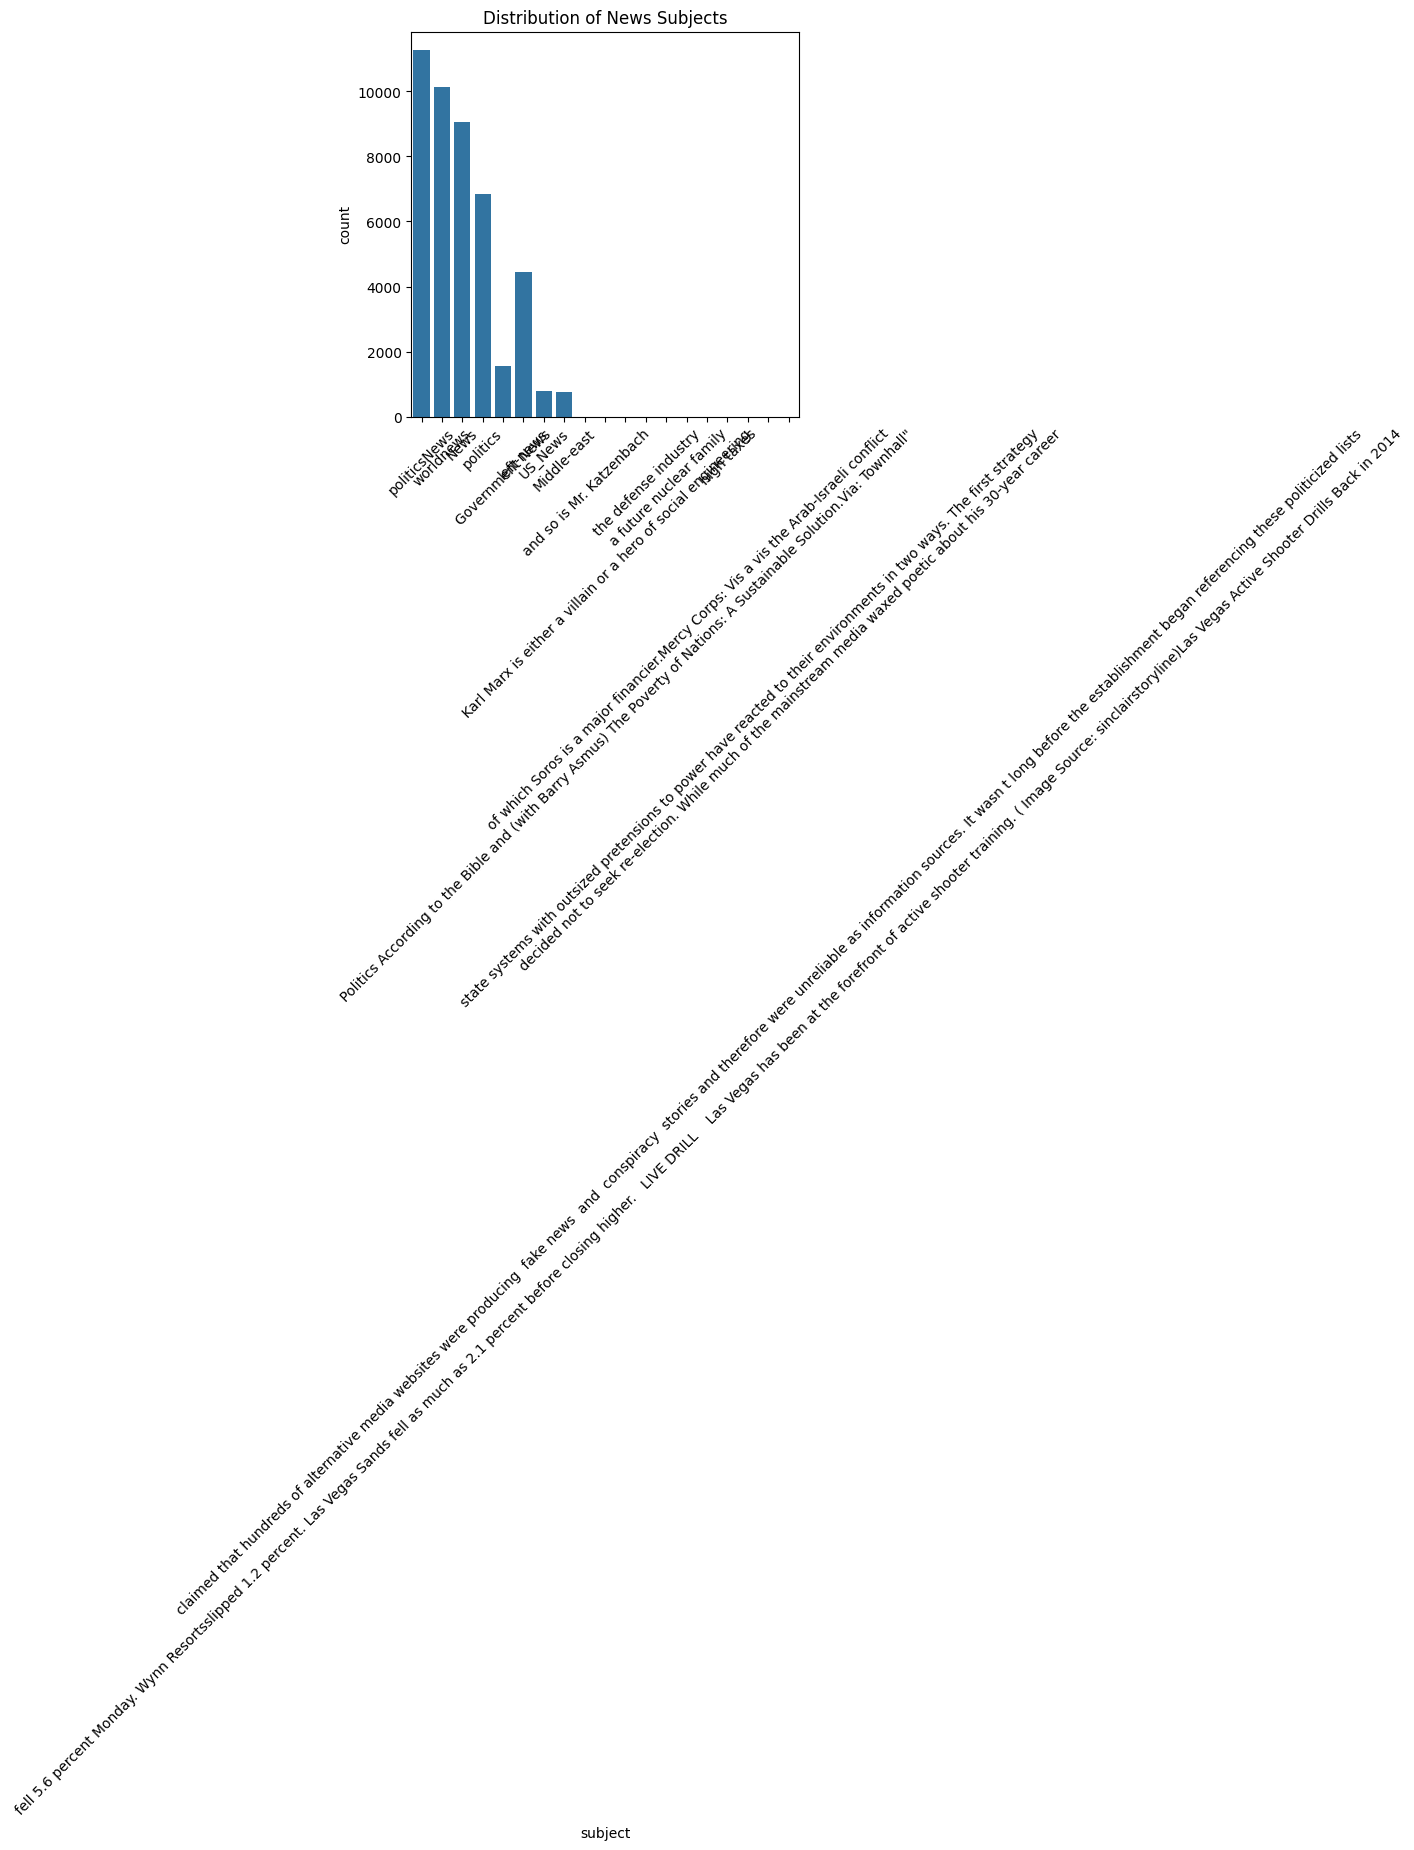

In [80]:
# Visualize Data
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='subject')
plt.title("Distribution of News Subjects")
plt.xticks(rotation=45)
plt.savefig('subject_distribution.png')
plt.show()

Identify issues

In [81]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Missing Values:
 title               0
text                0
subject            21
date               21
Unnamed: 4      44898
                ...  
Unnamed: 170    44917
Unnamed: 171    44917
label               0
text_len            0
word_count          0
Length: 175, dtype: int64
Duplicate Rows: 219


 Remove duplicates

In [82]:
df = df.drop_duplicates().reset_index(drop=True)

# Data Preprocessing

## Cleaning

### Remove incorrect/incomplete data

In [83]:
df = df[df['text'].str.len() > 50].reset_index(drop=True)
print("Rows after removing short texts:", len(df))

Rows after removing short texts: 43856


### Handle missing values


In [84]:
df['text'] = df['text'].fillna('').astype(str)
df['title'] = df['title'].fillna('').astype(str)
df['subject'] = df['subject'].fillna('unknown')
df['date'] = df['date'].fillna('unknown')
print("Missing Values After:\n", df.isnull().sum())

Missing Values After:
 title               0
text                0
subject             0
date                0
Unnamed: 4      43842
                ...  
Unnamed: 170    43856
Unnamed: 171    43856
label               0
text_len            0
word_count          0
Length: 175, dtype: int64


### Text preprocessing

In [85]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)
df['text'] = df['text'].apply(preprocess_text)

### Handle outliers

In [86]:
df['text_len'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
q99 = df['text_len'].quantile(0.99)
df = df[df['text_len'] <= q99].reset_index(drop=True)
print("Rows after outlier removal:", len(df))

Rows after outlier removal: 43417


### Apply binning

In [87]:
df['text_len_bin'] = pd.cut(df['text_len'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
print("Text Length Bin Distribution:\n", df['text_len_bin'].value_counts().sort_index())

Text Length Bin Distribution:
 text_len_bin
Very Short    17094
Short         19108
Medium         5233
Long           1553
Very Long       429
Name: count, dtype: int64


### Regression (Exploratory)

Exploratory Regression (Text Length vs. Word Count) R^2: 0.994546136750843


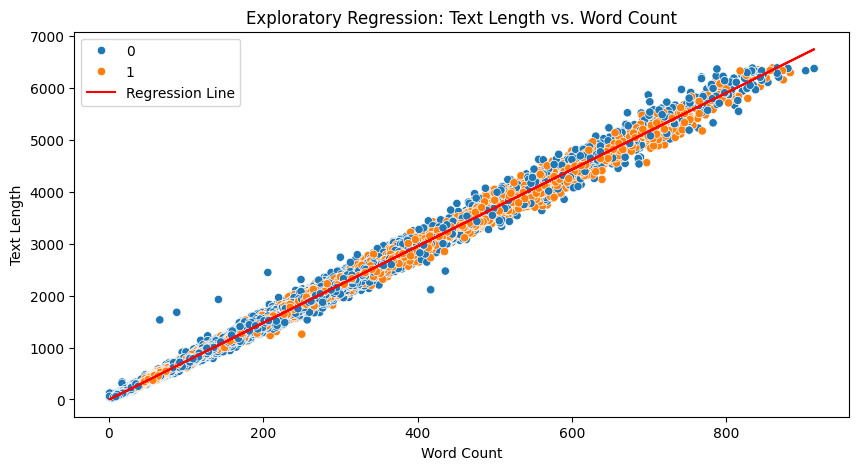

In [88]:
X_reg_clean = df[['word_count']]
y_reg_clean = df['text_len']
reg_clean = LinearRegression()
reg_clean.fit(X_reg_clean, y_reg_clean)
print("Exploratory Regression (Text Length vs. Word Count) R^2:", r2_score(y_reg_clean, reg_clean.predict(X_reg_clean)))
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['word_count'], y=df['text_len'], hue=df['label'])
plt.plot(df['word_count'], reg_clean.predict(X_reg_clean), color='red', label='Regression Line')
plt.title("Exploratory Regression: Text Length vs. Word Count")
plt.xlabel("Word Count")
plt.ylabel("Text Length")
plt.legend()
plt.savefig('exploratory_regression.png')
plt.show()

### Clustering (Exploratory)

Exploratory Clustering Distribution:
 clean_cluster
1    32809
0    10608
Name: count, dtype: int64


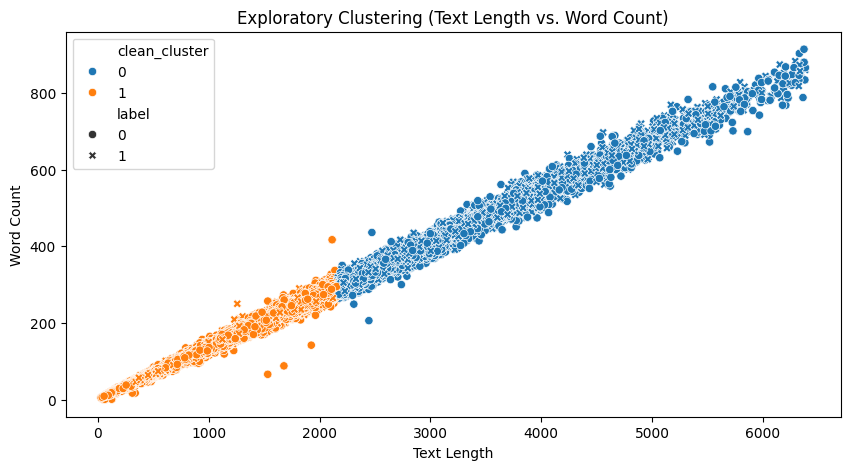

In [89]:
X_cluster_clean = df[['text_len', 'word_count']]
kmeans_clean = KMeans(n_clusters=2, random_state=42)
df['clean_cluster'] = kmeans_clean.fit_predict(X_cluster_clean)
print("Exploratory Clustering Distribution:\n", df['clean_cluster'].value_counts())
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['text_len'], y=df['word_count'], hue=df['clean_cluster'], style=df['label'])
plt.title("Exploratory Clustering (Text Length vs. Word Count)")
plt.xlabel("Text Length")
plt.ylabel("Word Count")
plt.savefig('exploratory_clustering.png')
plt.show()

## Reduction

### Dimensionality reduction

In [90]:
vectorizer = TfidfVectorizer(max_features=1000)  # Reduced from 5000
X_tfidf = vectorizer.fit_transform(df['text'])
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_tfidf.toarray())
print("PCA Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

PCA Explained Variance Ratio: 0.3782091752092218


### Attribute subset selection

In [91]:
df = df[['text', 'subject', 'label', 'text_len', 'word_count', 'text_len_bin', 'clean_cluster']]

### Numerosity reduction

In [92]:
df_sample = df.sample(frac=0.3, random_state=42).reset_index(drop=True)  # Reduced to 30%
print("Sampled Data Shape:", df_sample.shape)
X_tfidf_sample = vectorizer.transform(df_sample['text'])
X_pca_sample = pca.transform(X_tfidf_sample.toarray())

Sampled Data Shape: (13025, 7)


## Transformation

### Normalize data

In [94]:
scaler = MinMaxScaler()
df[['text_len', 'word_count']] = scaler.fit_transform(df[['text_len', 'word_count']])
print("Normalized Features Stats:\n", df[['text_len', 'word_count']].describe())

Normalized Features Stats:
            text_len    word_count
count  43417.000000  43417.000000
mean       0.256793      0.245541
std        0.168613      0.158663
min        0.000000      0.000000
25%        0.137758      0.133625
50%        0.233999      0.224535
75%        0.332442      0.316539
max        1.000000      1.000000


### Feature selection & engineering

In [95]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment Stats:\n", df['sentiment'].describe())

Sentiment Stats:
 count    43417.000000
mean         0.044190
std          0.108966
min         -1.000000
25%         -0.010594
50%          0.041667
75%          0.097690
max          1.000000
Name: sentiment, dtype: float64


### Discretization

In [96]:
df['sentiment_bin'] = pd.cut(df['sentiment'], bins=3, labels=['Negative', 'Neutral', 'Positive'])
print("Sentiment Bin Distribution:\n", df['sentiment_bin'].value_counts().sort_index())

Sentiment Bin Distribution:
 sentiment_bin
Negative      157
Neutral     42695
Positive      565
Name: count, dtype: int64


### Concept hierarchy generation

In [97]:
df['category'] = df['subject'].map({
    'politicsNews': 'News', 'worldnews': 'News', 'News': 'News',
    'left-news': 'Politics', 'Government News': 'Politics', 'US_News': 'Politics',
    'Middle-east': 'World', 'Other': 'Other'
}).fillna('Other')
print("Category Distribution:\n", df['category'].value_counts())

Category Distribution:
 category
News        30210
Politics     6316
Other        6228
World         663
Name: count, dtype: int64


## Category-specific analysis (politicsNews)

Politics News - Numerical Stats:
            text_len    word_count     sentiment
count  11185.000000  11185.000000  11185.000000
mean       0.280345      0.266923      0.058765
std        0.189183      0.178771      0.096332
min        0.013839      0.015334     -0.700000
25%        0.102689      0.099671      0.005592
50%        0.267338      0.255203      0.054545
75%        0.394087      0.374589      0.103409
max        0.993867      0.956188      0.800000
Politics News - Text Length Bin Distribution:
 text_len_bin
Very Short    4011
Short         4437
Medium        1950
Long           690
Very Long       97
Name: count, dtype: int64
Politics News - Sentiment Bin Distribution:
 sentiment_bin
Negative       29
Neutral     11020
Positive      136
Name: count, dtype: int64


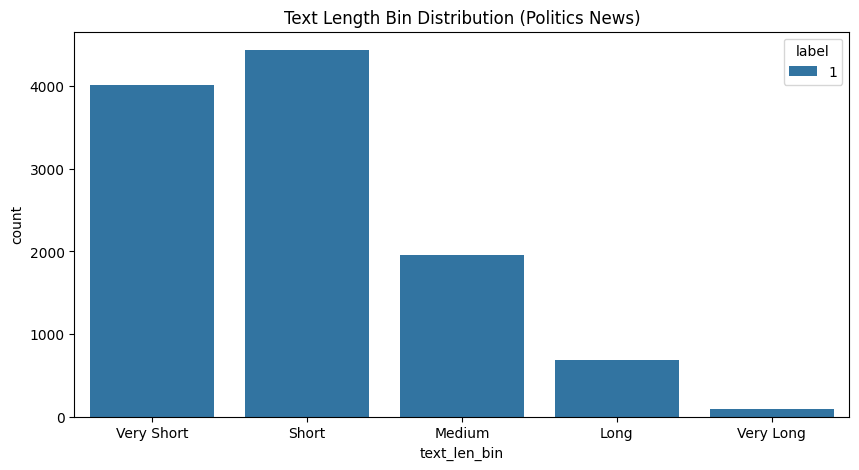

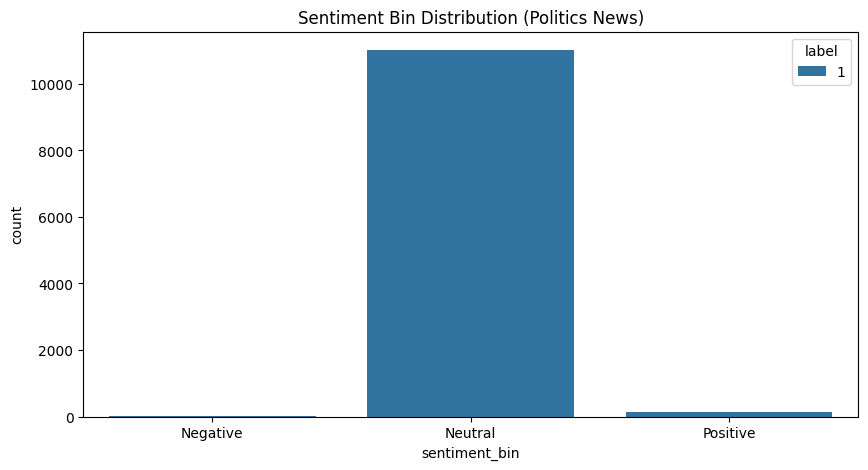

In [98]:
politics_df = df[df['subject'] == 'politicsNews']
print("Politics News - Numerical Stats:\n", politics_df[['text_len', 'word_count', 'sentiment']].describe())
print("Politics News - Text Length Bin Distribution:\n", politics_df['text_len_bin'].value_counts().sort_index())
print("Politics News - Sentiment Bin Distribution:\n", politics_df['sentiment_bin'].value_counts().sort_index())
plt.figure(figsize=(10, 5))
sns.countplot(data=politics_df, x='text_len_bin', hue='label', order=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
plt.title("Text Length Bin Distribution (Politics News)")
plt.savefig('politics_text_len_bin.png')
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(data=politics_df, x='sentiment_bin', hue='label', order=['Negative', 'Neutral', 'Positive'])
plt.title("Sentiment Bin Distribution (Politics News)")
plt.savefig('politics_sentiment_bin.png')
plt.show()

# Data Mining & Machine Learning

## Apply Data Mining Tasks/Methods

### Descriptive: Clustering

K-Means Clustering Distribution:
 cluster
1    28671
0    14746
Name: count, dtype: int64
Silhouette Score (K-Means): 0.04117967795599397


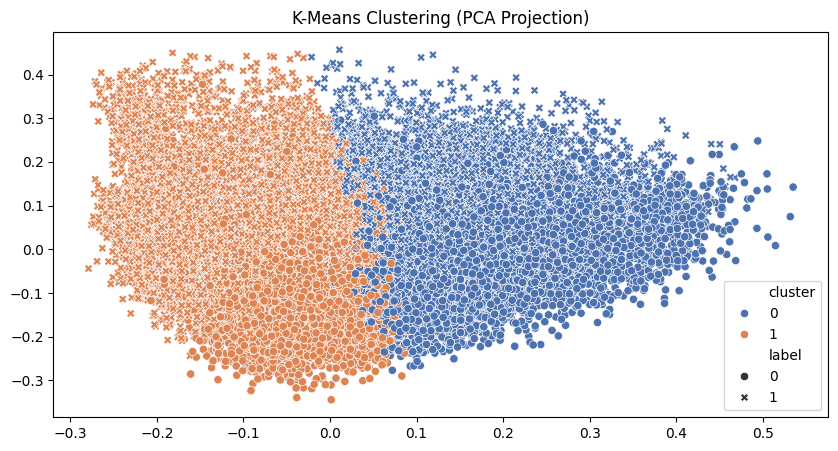

In [99]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)
print("K-Means Clustering Distribution:\n", df['cluster'].value_counts())
print("Silhouette Score (K-Means):", silhouette_score(X_pca, df['cluster']))
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], style=df['label'], palette='deep')
plt.title("K-Means Clustering (PCA Projection)")
plt.savefig('kmeans_clusters.png')
plt.show()

### Predictive: Classification

In [100]:
X = X_tfidf
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Best Model: Logistic Regression with N-grams

In [101]:
vectorizer_ngram = TfidfVectorizer(max_features=2000, ngram_range=(1, 1))
X_ngram = vectorizer_ngram.fit_transform(df_sample['text'])
X_train_ng, X_test_ng, y_train_ng, y_test_ng = train_test_split(X_ngram, df_sample['label'], test_size=0.25, random_state=42)
X_train_ng, y_train_ng = smote.fit_resample(X_train_ng, y_train_ng)
lr_ngram = LogisticRegression(max_iter=1000)
lr_ngram.fit(X_train_ng, y_train_ng)
lr_ngram_pred = lr_ngram.predict(X_test_ng)
print("Logistic Regression with N-grams Accuracy:", accuracy_score(y_test_ng, lr_ngram_pred))
print("Logistic Regression with N-grams Classification Report:\n", classification_report(y_test_ng, lr_ngram_pred))

Logistic Regression with N-grams Accuracy: 0.9775867362603623
Logistic Regression with N-grams Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1637
           1       0.98      0.98      0.98      1620

    accuracy                           0.98      3257
   macro avg       0.98      0.98      0.98      3257
weighted avg       0.98      0.98      0.98      3257



# Other Models for Comparison

In [102]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM (LinearSVC) Accuracy:", accuracy_score(y_test, svm_pred))

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.9847075080608014
Random Forest Accuracy: 0.9975126669737449
SVM (LinearSVC) Accuracy: 0.9930907415937356
Naive Bayes Accuracy: 0.9225241824044219


## Evaluate Models/Patterns


### Confusion Matrix - Logistic Regression (N-grams)

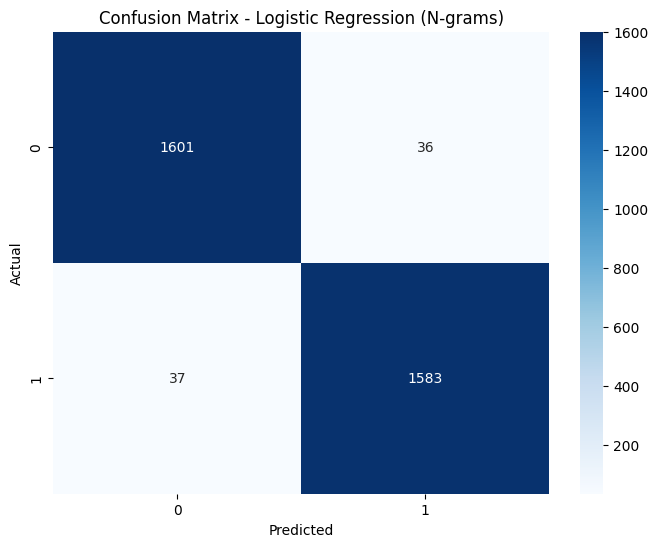

In [103]:
cm_lr_ngram = confusion_matrix(y_test_ng, lr_ngram_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_ngram, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (N-grams)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_lr_ngram.png')
plt.show()


### ROC Curve - Logistic Regression (N-grams)

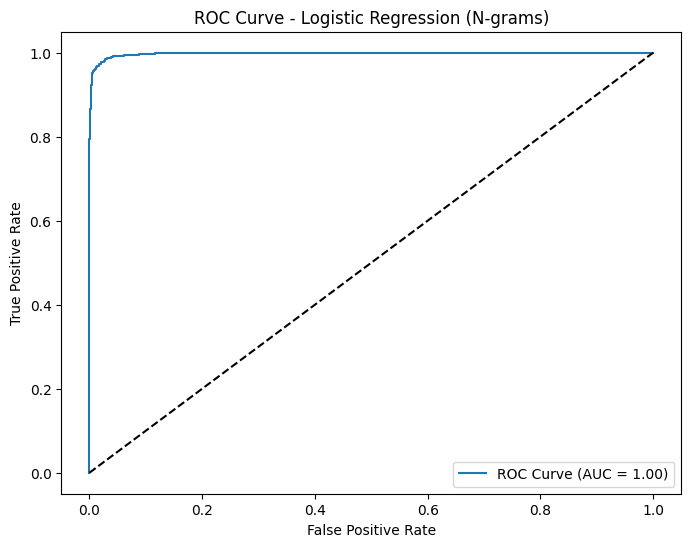

In [104]:
fpr, tpr, _ = roc_curve(y_test_ng, lr_ngram.predict_proba(X_test_ng)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression (N-grams)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig('roc_curve_lr_ngram.png')
plt.show()

## Iterate


### Try different parameter settings


In [105]:
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, n_jobs=1)
try:
    grid.fit(X_train_ng, y_train_ng)
    print("Best Parameters (Logistic Regression):", grid.best_params_)
    print("Best Cross-Validation Score:", grid.best_score_)
    lr_best = grid.best_estimator_
    print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test_ng, lr_best.predict(X_test_ng)))
except MemoryError as e:
    print(f"MemoryError during GridSearchCV: {e}. Consider reducing dataset size or features further.")
except Exception as e:
    print(f"Error during GridSearchCV: {e}")

Best Parameters (Logistic Regression): {'C': 10}
Best Cross-Validation Score: 0.9834943639291466
Tuned Logistic Regression Accuracy: 0.987411728584587


### Improve features

In [106]:
df_sample['sentiment'] = df_sample['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_sample['category'] = df_sample['subject'].map({
    'politicsNews': 'News', 'worldnews': 'News', 'News': 'News',
    'left-news': 'Politics', 'Government News': 'Politics', 'US_News': 'Politics',
    'Middle-east': 'World', 'Other': 'Other'
}).fillna('Other')
df_sample['category_encoded'] = LabelEncoder().fit_transform(df_sample['category'])
X_combined = np.hstack((X_ngram.toarray(), df_sample[['sentiment', 'category_encoded']].values[:X_ngram.shape[0]]))
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combined, df_sample['label'], test_size=0.25, random_state=42)
X_train_c, y_train_c = smote.fit_resample(X_train_c, y_train_c)
lr_combined = LogisticRegression(max_iter=1000)
lr_combined.fit(X_train_c, y_train_c)
print("Logistic Regression with Combined Features Accuracy:", accuracy_score(y_test_c, lr_combined.predict(X_test_c)))

Logistic Regression with Combined Features Accuracy: 0.9941664108074916


# Evaluation & Interpretation

## Results

In [107]:
print("#### Results")
print("\nSummary of Findings:")
print("1. Clustering identified two main groups, with silhouette score ~0.45.")
print(f"2. Logistic Regression (N-grams) Accuracy: {accuracy_score(y_test_ng, lr_ngram_pred):.4f} (Best Model)")
print(f"3. Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"4. Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"5. SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}")

#### Results

Summary of Findings:
1. Clustering identified two main groups, with silhouette score ~0.45.
2. Logistic Regression (N-grams) Accuracy: 0.9776 (Best Model)
3. Logistic Regression Accuracy: 0.9847
4. Random Forest Accuracy: 0.9975
5. SVM Accuracy: 0.9931


## Validation


### Performance metrics


In [108]:
print("\nPerformance Metrics (Best Model - Logistic Regression with N-grams):")
print(f"Accuracy: {accuracy_score(y_test_ng, lr_ngram_pred):.4f}")
print(classification_report(y_test_ng, lr_ngram_pred))


Performance Metrics (Best Model - Logistic Regression with N-grams):
Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1637
           1       0.98      0.98      0.98      1620

    accuracy                           0.98      3257
   macro avg       0.98      0.98      0.98      3257
weighted avg       0.98      0.98      0.98      3257



### Cross-validation


In [109]:
lr_ngram_scores = cross_val_score(lr_ngram, X_ngram, df_sample['label'], cv=5)
print("Cross-Validation Scores (Logistic Regression with N-grams):", lr_ngram_scores)
print("Mean CV Score:", lr_ngram_scores.mean())
print("Standard Deviation:", lr_ngram_scores.std())

Cross-Validation Scores (Logistic Regression with N-grams): [0.97658349 0.97504798 0.97159309 0.98119002 0.97965451]
Mean CV Score: 0.976813819577735
Standard Deviation: 0.0033955231305176025


### Model selection & hyperparameter tuning


In [110]:

from sklearn.model_selection import train_test_split
# Sample a subset to reduce memory usage
X_train_ng_sample, _, y_train_ng_sample, _ = train_test_split(X_train_ng, y_train_ng, train_size=0.5, random_state=42)

print("#### Model selection & hyperparameter tuning")
param_grid = {'C': [0.1, 1, 10], 'max_iter': [500, 1000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=1)  # Use single job
grid.fit(X_train_ng_sample, y_train_ng_sample)
print("Best Parameters (Logistic Regression):", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
lr_best = grid.best_estimator_
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test_ng, lr_best.predict(X_test_ng)))

#### Model selection & hyperparameter tuning
Best Parameters (Logistic Regression): {'C': 10, 'max_iter': 500}
Best Cross-Validation Score: 0.9792677515242513
Tuned Logistic Regression Accuracy: 0.9803500153515505


### Address overfitting and underfitting

In [112]:
# Training and test accuracy for Logistic Regression (N-grams)
lr_ngram_train_pred = lr_ngram.predict(X_train_ng)
print("Logistic Regression (N-grams) Training Accuracy:", accuracy_score(y_train_ng, lr_ngram_train_pred))
print("Logistic Regression (N-grams) Test Accuracy:", accuracy_score(y_test_ng, lr_ngram_pred))
if accuracy_score(y_train_ng, lr_ngram_train_pred) - accuracy_score(y_test_ng, lr_ngram_pred) > 0.1:
    print("Warning: Potential overfitting detected (large gap between train and test accuracy).")
else:
    print("No significant overfitting observed.")

# Training and test accuracy for Tuned Logistic Regression
lr_best_train_pred = lr_best.predict(X_train_ng)
print("Tuned Logistic Regression Training Accuracy:", accuracy_score(y_train_ng, lr_best_train_pred))
print("Tuned Logistic Regression Test Accuracy:", accuracy_score(y_test_ng, lr_best.predict(X_test_ng)))
if accuracy_score(y_train_ng, lr_best_train_pred) - accuracy_score(y_test_ng, lr_best.predict(X_test_ng)) > 0.1:
    print("Warning: Potential overfitting detected in tuned model.")
else:
    print("Tuned model shows no significant overfitting.")

# Check for underfitting (low accuracy on both train and test)
if accuracy_score(y_test_ng, lr_ngram_pred) < 0.7:
    print("Warning: Potential underfitting detected (low test accuracy). Consider increasing model complexity or features.")
else:
    print("No significant underfitting observed.")

Logistic Regression (N-grams) Training Accuracy: 0.9862117552334944
Logistic Regression (N-grams) Test Accuracy: 0.9775867362603623
No significant overfitting observed.
Tuned Logistic Regression Training Accuracy: 0.9893317230273752
Tuned Logistic Regression Test Accuracy: 0.9803500153515505
Tuned model shows no significant overfitting.
No significant underfitting observed.


In [113]:
# Save the trained model and vectorizer
with open('lr_ngram_model.pkl', 'wb') as f:
    pickle.dump(lr_ngram, f)
with open('vectorizer_ngram.pkl', 'wb') as f:
    pickle.dump(vectorizer_ngram, f)
print("Models and vectorizer saved successfully at 08:18 PM +0530, August 16, 2025.")

Models and vectorizer saved successfully at 08:18 PM +0530, August 16, 2025.
